In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\orteg\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
model_df = pd.read_csv("model_only_data.csv")

In [3]:
model_df.head()

,Unnamed: 0,amount_requested,reason_for_loan,debt_to_income_ratio,zip_code,state,emp_length,policy_code,applicant_result
0,0,9600.0,Credit card refinancing,24.45,816xx,CO,4 years,1,1
1,1,6000.0,Home improvement,14.34,210xx,MD,10+ years,1,1
2,2,10000.0,Debt consolidation,25.35,890xx,NV,7 years,1,1
3,3,25000.0,Debt consolidation,7.17,640xx,MO,5 years,1,1
4,4,2000.0,Other,9.30,923xx,CA,4 years,1,1


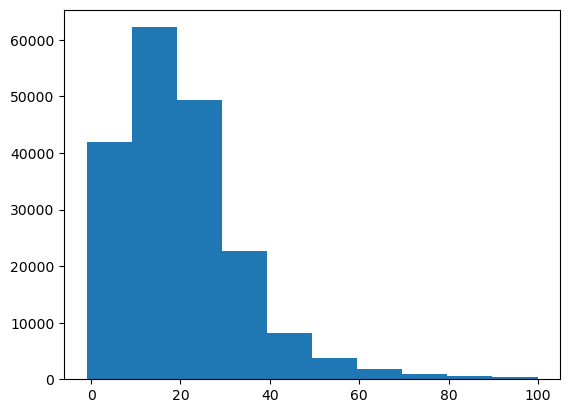

In [4]:
plt.hist(model_df['debt_to_income_ratio'][model_df['debt_to_income_ratio'] < 100])
plt.show()

In [5]:
len(model_df['debt_to_income_ratio'][model_df['debt_to_income_ratio'] < 100])/len(model_df)

0.959955

There is a small percentage of data points that describe applicants as having debt greater than their income. Extreme amounts of a ratio are presented that I think are either misinputs or very uncharacteristic of the overall data and do not provide and value. So, I will be using a debt-to-income ratio up to 100.

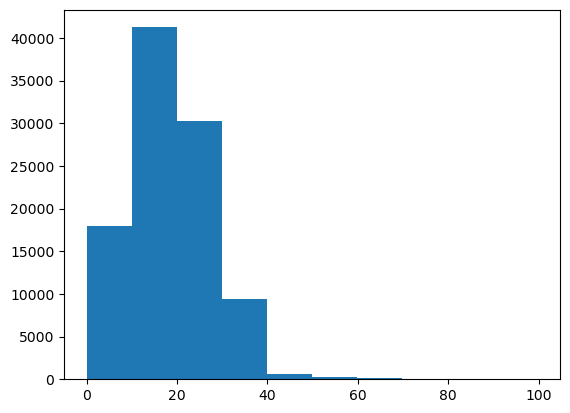

In [6]:
plt.hist(model_df['debt_to_income_ratio'][(model_df['debt_to_income_ratio'] <= 100) & (model_df['applicant_result'] == 1)])
plt.show()

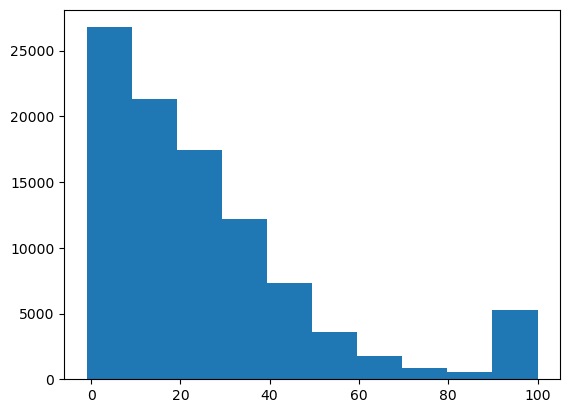

In [7]:
plt.hist(model_df['debt_to_income_ratio'][(model_df['debt_to_income_ratio'] <= 100) & (model_df['applicant_result'] == 0)])
plt.show()

In [8]:
graph_df = model_df[['debt_to_income_ratio', 'applicant_result']][model_df['debt_to_income_ratio'] <= 100]

Text(0.5, 1.0, 'Accepted and Rejected Debt-To-Income-Ratio')

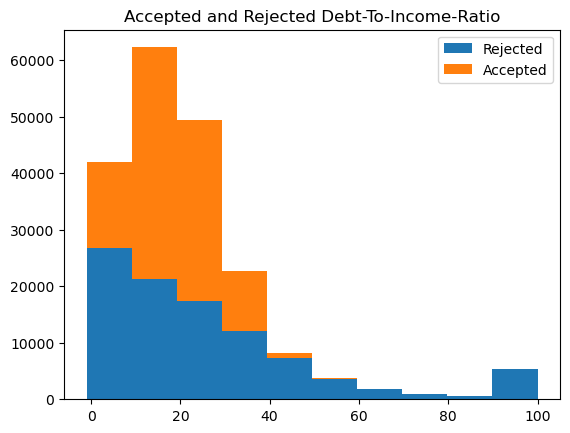

In [9]:
plt.hist([graph_df['debt_to_income_ratio'][graph_df['applicant_result'] == 0],
          graph_df['debt_to_income_ratio'][graph_df['applicant_result'] == 1]], 
         density=False, histtype='bar', stacked=True, label=['Rejected', 'Accepted'])
plt.legend(prop={'size': 10})
plt.title('Accepted and Rejected Debt-To-Income-Ratio')

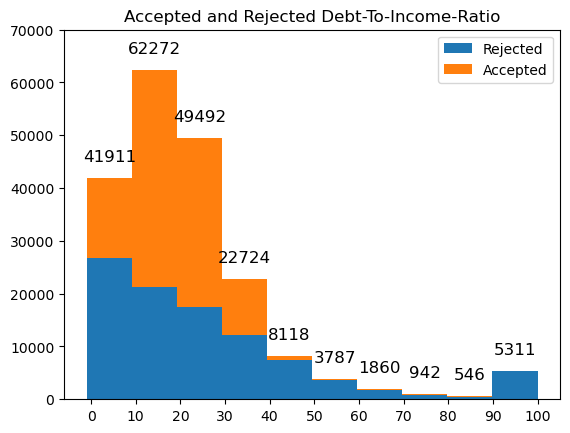

In [15]:
fig, ax = plt.subplots()
counts, edges, bars = ax.hist([graph_df['debt_to_income_ratio'][graph_df['applicant_result'] == 0],
          graph_df['debt_to_income_ratio'][graph_df['applicant_result'] == 1]], histtype='barstacked', 
                              label=['Rejected', 'Accepted'])
ax.legend(prop={'size': 10})
ax.set_title('Accepted and Rejected Debt-To-Income-Ratio')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.yticks([0,10000,20000,30000,40000,50000,60000,70000])

#ax.bar_label(bars[0], padding=-1, color='black', fontsize=12)#, label_type='center')
ax.bar_label(bars[1], padding=10, color='black', fontsize=12)
plt.show()